# Pertemuan 18

---

## Supervised Learning - KNN ( K-Nearest Neighbors)

Algoritma machine learning yang memprediksi sesuatu berdasarkan tetangga terdekatnya.

Ibaratnya, kalau kamu ingin menebak hobi seseorang, kamu lihat K orang terdekat dengannya dan lihat mayoritas hobinya apa.

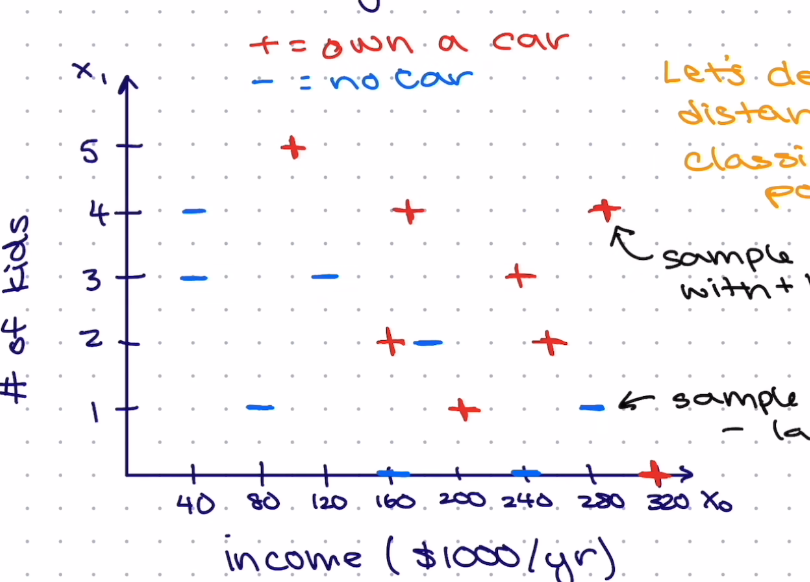

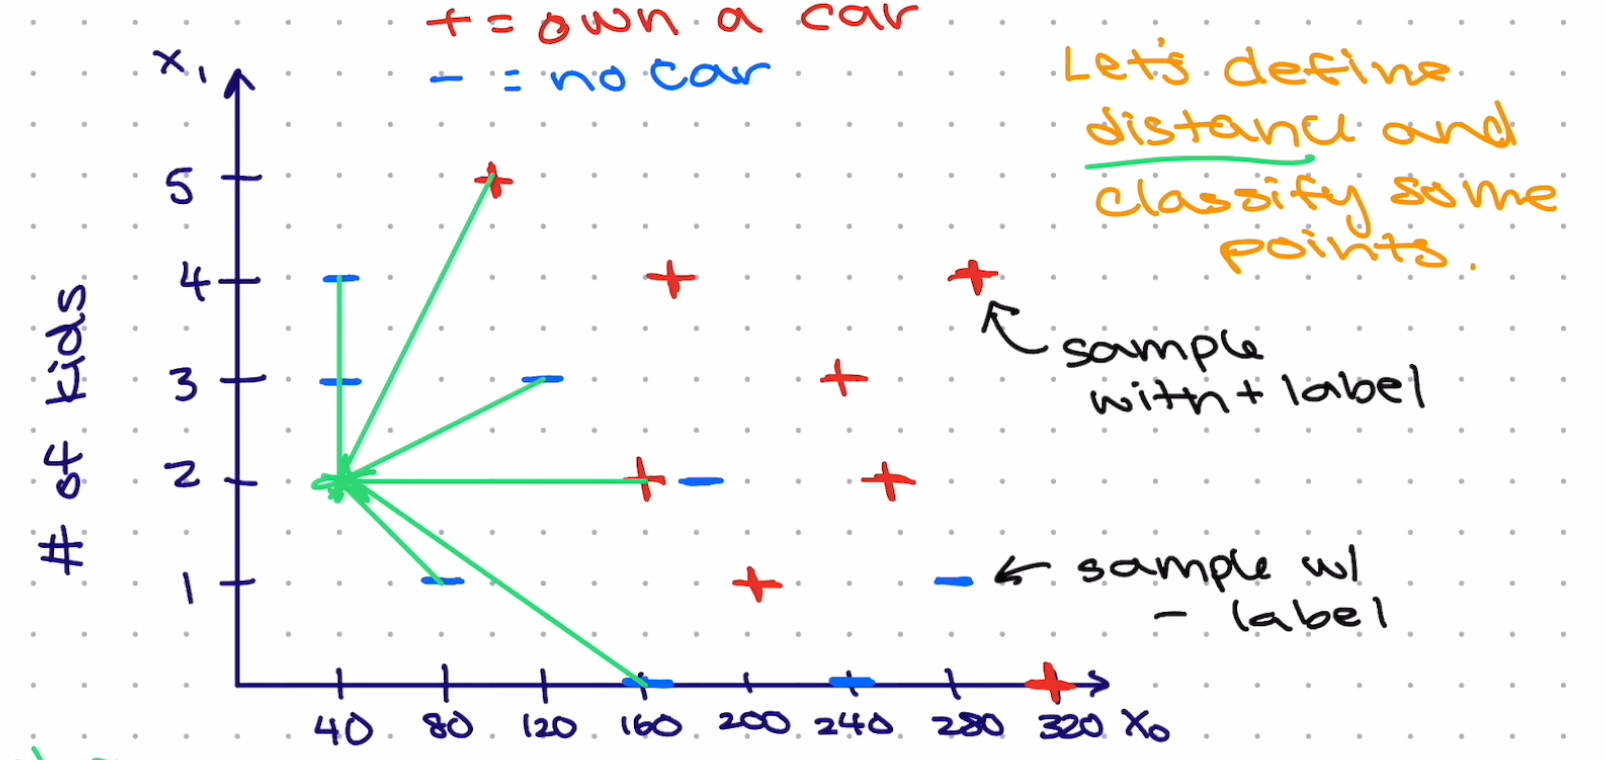

### Cara kerja
1. Pilih jumlah tetangga (K) yang mau dipertimbangkan.

    - Contoh: K = 3 berarti kita lihat 3 data terdekat.

2. Hitung jarak antara data baru dengan semua data di dataset.

    - Jarak biasanya dihitung dengan Euclidean Distance:

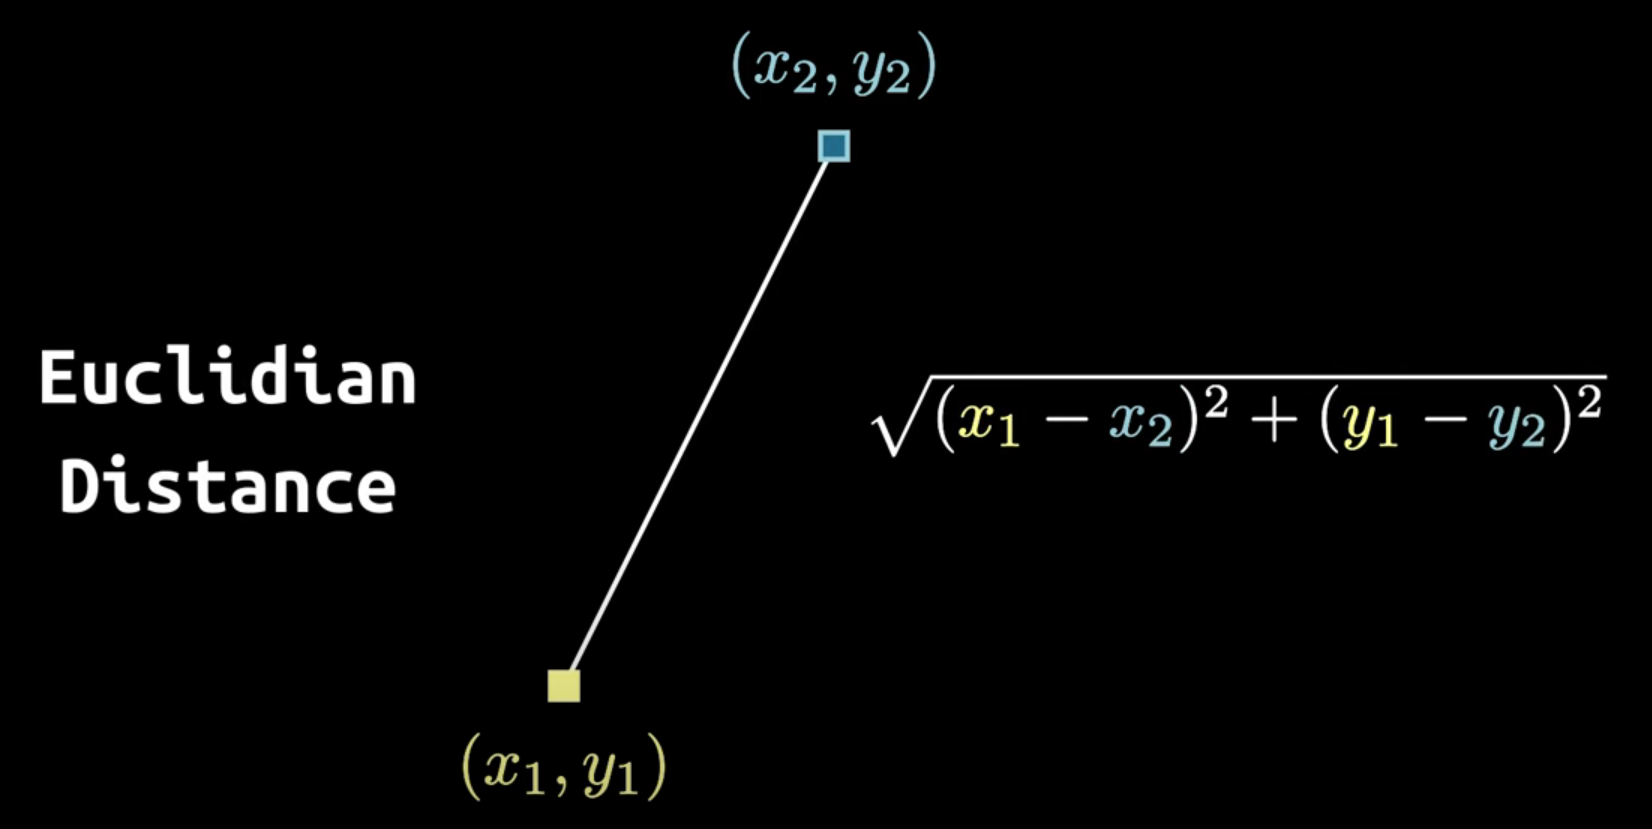

3. Urutkan dari jarak yang paling dekat.

4. Ambil K tetangga terdekat.

5. Tentukan prediksi:

- Untuk klasifikasi → pilih mayoritas kelas dari tetangga itu.

- Untuk regresi → ambil rata-rata nilainya.

### Kelebihan
- Sederhana dan mudah dipahami.

- Tidak perlu proses training rumit.

### Kekurangan
- Lambat untuk dataset besar (karena harus hitung jarak ke semua data).

- Sensitif terhadap skala data → perlu normalisasi/standarisasi.

## Karakteristik KNN (K-Nearest Neighbor)

1. Bersifat Lazy Learning (non-parametric)

    - Tidak membuat model atau persamaan matematis untuk belajar.

    - Data training disimpan apa adanya, dan proses prediksi dilakukan saat ada data baru.

    - Ibaratnya: “Nggak belajar di awal, tapi berpikir keras saat ujian.”

2. Berdasarkan Kemiripan (Similarity)

    - Mengukur jarak antara data baru dengan semua data di training set.

    - Umumnya menggunakan Euclidean Distance (jarak garis lurus), tapi bisa juga pakai Manhattan, Minkowski, dll.

3. K = jumlah tetangga terdekat

    - Nilai K ditentukan manual (hyperparameter).

    - K kecil → lebih sensitif terhadap noise.

    - K besar → hasil lebih stabil tapi bisa kehilangan detail lokal.

4. Tidak Membutuhkan Asumsi Distribusi Data

    - Cocok untuk data yang distribusinya tidak mengikuti pola tertentu (misalnya tidak normal).

5. Sangat Bergantung pada Skala Data

    - Kalau variabel memiliki skala berbeda (misal cm dan kg), perlu normalisasi/ standarisasi supaya jarak lebih adil.

6. Cocok untuk Data Berdimensi Kecil–Menengah

    - Kalau data berdimensi besar (high dimensional), perhitungan jarak bisa kurang akurat (fenomena curse of dimensionality).

7. Output Berdasarkan Mayoritas (Klasifikasi) atau Rata-rata (Regresi)

    - Untuk klasifikasi: mayoritas label tetangga dipilih.

    - Untuk regresi: rata-rata nilai tetangga dipakai.

## Visualisasi

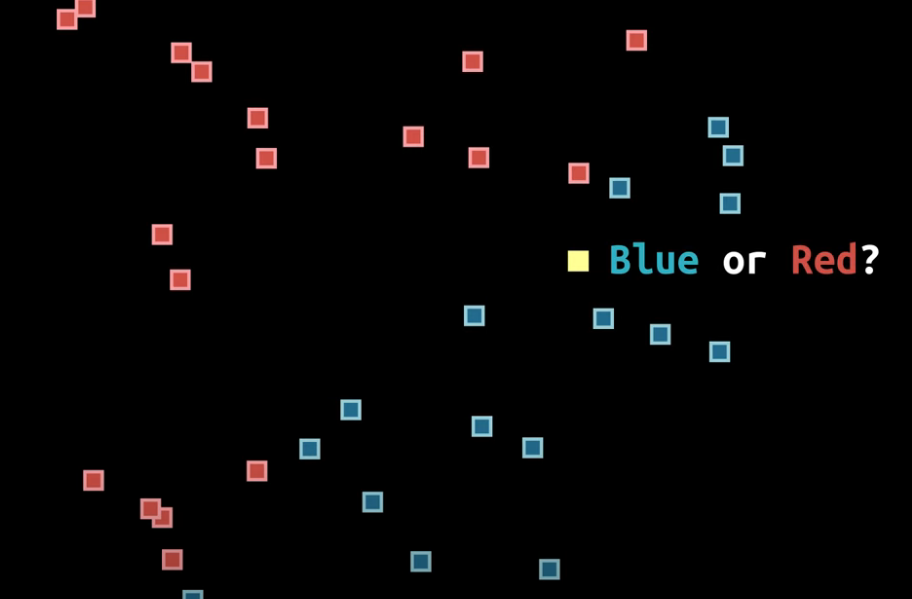

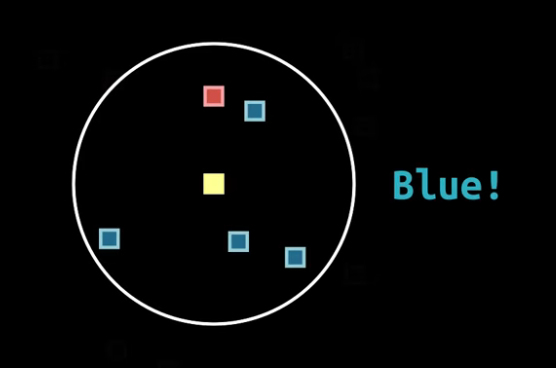

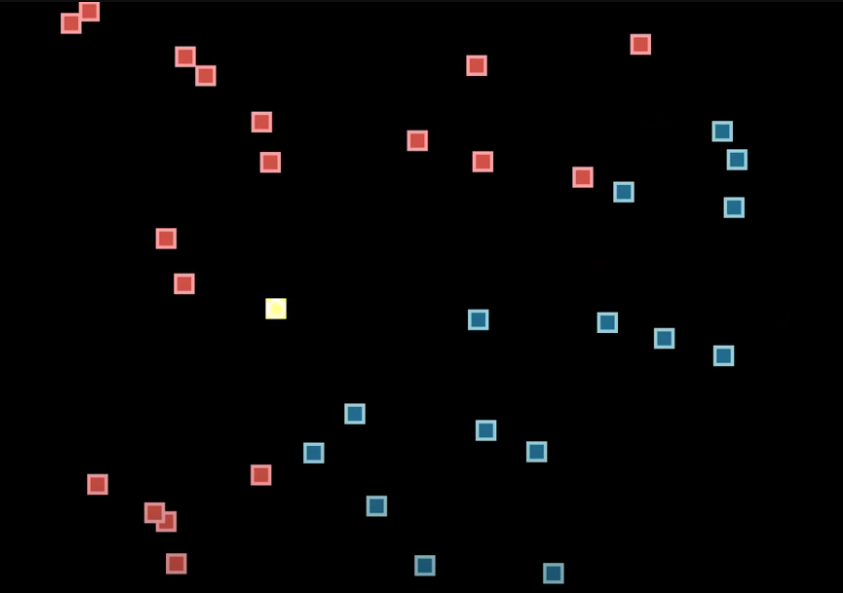

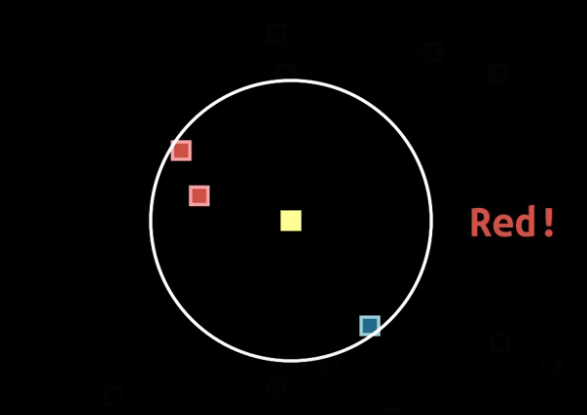

## Implementasi KNN

Membangun model KNN, menguji akurasinya, dan memvisualisasikan data beserta titik yang akan diprediksi.

Dataset yang digunakan adalah Iris dataset :
- Jumlah sampel: 150 data bunga.

- Fitur :

1. Sepal length (cm)

2. Sepal width (cm)

3. Petal length (cm)

4. Petal width (cm)

- Kelas :

1. Iris setosa

2. Iris versicolor

3. Iris virginica

In [1]:
# 1. Import library yang dibutuhkan
from sklearn.datasets import load_iris                # untuk mengambil dataset iris bawaan sklearn
from sklearn.model_selection import train_test_split  # untuk membagi data menjadi training & testing
from sklearn.preprocessing import StandardScaler      # untuk standarisasi data
from sklearn.neighbors import KNeighborsClassifier    # algoritma KNN
from sklearn.metrics import accuracy_score, classification_report  # untuk evaluasi model

In [2]:
# 2. Load dataset Iris
iris = load_iris()      # memanggil dataset iris
X = iris.data           # fitur (4 kolom: sepal length, sepal width, petal length, petal width)
y = iris.target         # label (0=setosa, 1=versicolor, 2=virginica)

print("Contoh fitur X:\n", X[:5])
print("\nContoh label y:\n", y[:5])

Contoh fitur X:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Contoh label y:
 [0 0 0 0 0]


In [3]:
# 3. Bagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                 # dataset (fitur dan label)
    test_size=0.2,        # 20% data untuk testing, 80% untuk training
    random_state=42       # supaya hasil pembagian data sama setiap dijalankan
)

print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))

Jumlah data training: 120
Jumlah data testing: 30


In [4]:
# 4. Standarisasi data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)   # hitung skala dari data training lalu transformasi
X_test = scaler.transform(X_test)         # gunakan skala yang sama untuk data testing

print("Contoh data training setelah scaling:\n", X_train[:5])

Contoh data training setelah scaling:
 [[-1.47393679  1.20365799 -1.56253475 -1.31260282]
 [-0.13307079  2.99237573 -1.27600637 -1.04563275]
 [ 1.08589829  0.08570939  0.38585821  0.28921757]
 [-1.23014297  0.75647855 -1.2187007  -1.31260282]
 [-1.7177306   0.30929911 -1.39061772 -1.31260282]]


In [5]:
# 5. Buat model KNN
knn = KNeighborsClassifier(n_neighbors=5)  # K=5

In [6]:
# 6. Latih model
knn.fit(X_train, y_train)
print("Model KNN berhasil dilatih!")

Model KNN berhasil dilatih!


In [7]:
# 7. Prediksi data testing
y_pred = knn.predict(X_test)
print("Hasil prediksi:\n", y_pred)

Hasil prediksi:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [10]:
# 8. Evaluasi model
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(
    y_test, y_pred, target_names=iris.target_names
))

Akurasi: 1.0

Laporan Klasifikasi:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [11]:
# 9. Prediksi data baru
contoh_data = [[5.1, 3.5, 1.4, 0.2]] # data baru         
contoh_data_scaled = scaler.transform(contoh_data)  
prediksi = knn.predict(contoh_data_scaled)   
print("\nPrediksi kelas untuk data baru:", iris.target_names[prediksi][0])


Prediksi kelas untuk data baru: setosa


### Alur Kerja :
1. Ambil data

2. Bagi jadi training & testing

3. Standarisasi

4. Buat model KNN → tentukan K

5. Latih model dengan training data

6. Uji model dengan testing data

7. Prediksi data baru

### Penjelasan :
1. load_iris() → mengambil dataset Iris dari sklearn.

2. train_test_split() → memisahkan data untuk training dan testing.

3. StandardScaler → membuat semua fitur berada pada skala yang sama.

4. KNeighborsClassifier(n_neighbors=5) → membuat model KNN dengan K=5.

5. fit() → melatih model dengan data training.

6. predict() → memprediksi label data baru.

7. accuracy_score & classification_report → untuk mengevaluasi performa model.

### Lainnya :
- Titik merah = Iris setosa

- Titik hijau = Iris versicolor

- Titik biru = Iris virginica

- Titik kuning besar = data baru yang kamu masukkan di kode
→ KNN akan mencari 5 tetangga terdekatnya untuk menentukan kelas.

### Dengan Gambar scatter plot


Dataset Iris punya 4 fitur → agak susah kalau divisualisasi 4 dimensi.

Jadi, kita ambil 2 fitur saja (misalnya petal length & petal width) supaya bisa digambar di sumbu X-Y.

Kita akan gambarkan titik data training dan titik data baru lalu hubungkan dengan tetangga terdekatnya.

Prediksi kelas untuk data baru: setosa


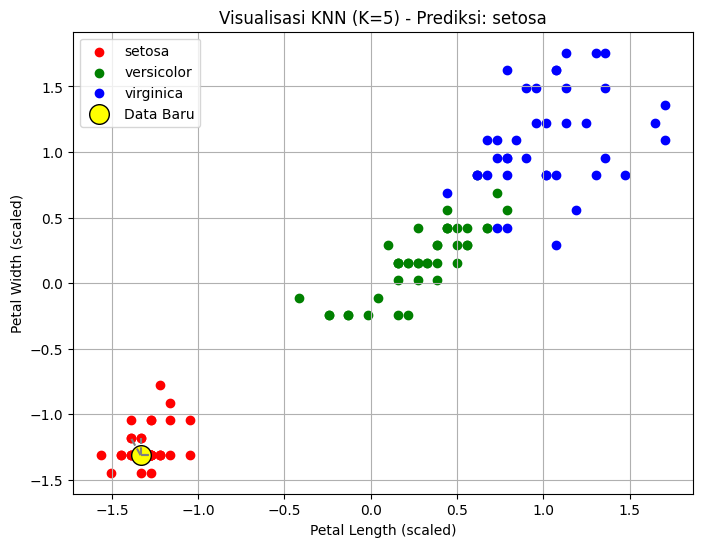

In [12]:
# VISUALISASI KNN DENGAN 5 TETANGGA TERDEKAT
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


# 1. Load dataset Iris
iris = load_iris()        # Ambil dataset iris bawaan sklearn
X = iris.data             # Fitur (4 kolom: sepal length, sepal width, petal length, petal width)
y = iris.target           # Label (0=setosa, 1=versicolor, 2=virginica)


# 2. Bagi data menjadi training & testing
#    test_size=0.2 artinya 20% data untuk uji
#    random_state=42 supaya pembagian data konsisten
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# 3. Standarisasi data
#    Kenapa? Karena KNN menghitung jarak Euclidean.
#    Jika skala fitur beda, fitur besar bisa mendominasi perhitungan jarak.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Latih scaler dan ubah data training
X_test_scaled = scaler.transform(X_test)        # Gunakan scaler yang sama untuk test data


# 4. Buat model KNN
#    n_neighbors=5 → K=5, artinya melihat 5 tetangga terdekat untuk voting
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)  # "Melatih" KNN = menyimpan data training


# 5. Contoh data baru yang mau diprediksi
contoh_data = np.array([[5.1, 3.5, 1.4, 0.2]])   # Empat fitur sesuai format dataset
contoh_data_scaled = scaler.transform(contoh_data)  # Standarisasi data baru
prediksi = knn.predict(contoh_data_scaled)           # Prediksi kelasnya
print("Prediksi kelas untuk data baru:", iris.target_names[prediksi][0])


# 6. Ambil 2 fitur saja untuk visualisasi
#    Kita ambil: Petal Length (kolom 2) & Petal Width (kolom 3)
#    Tujuannya agar mudah divisualisasikan di grafik 2D
X_vis = X_train_scaled[:, 2:4]     # Hanya ambil kolom index 2 & 3 dari data training
y_vis = y_train
contoh_vis = contoh_data_scaled[:, 2:4]  # Data baru dalam format 2 fitur ini


# 7. Cari 5 tetangga terdekat dari data baru
#    kneighbors() mengembalikan:
#    - distances → jarak ke masing-masing tetangga
#    - indices   → index lokasi tetangga di data training
distances, indices = knn.kneighbors(contoh_data_scaled)


# 8. Plot data training (warna per kelas)
plt.figure(figsize=(8,6))
colors = ['red', 'green', 'blue']  # Setosa, Versicolor, Virginica
for i, color in enumerate(colors):
    plt.scatter(
        X_vis[y_vis == i, 0],  # Sumbu X = Petal length
        X_vis[y_vis == i, 1],  # Sumbu Y = Petal width
        color=color, label=iris.target_names[i]
    )


# 9. Plot titik data baru di grafik
plt.scatter(
    contoh_vis[0,0], contoh_vis[0,1],       # Posisi data baru
    color='yellow', edgecolor='black', s=200, label='Data Baru'
)


# 10. Gambar garis dari data baru ke tetangga-tetangga terdekatnya
for idx in indices[0]:
    tetangga_point = X_vis[idx]
    plt.plot(
        [contoh_vis[0,0], tetangga_point[0]],   # X (petal length)
        [contoh_vis[0,1], tetangga_point[1]],   # Y (petal width)
        color='gray', linestyle='--'
    )


# 11. Tambahkan dekorasi pada plot
plt.xlabel("Petal Length (scaled)")
plt.ylabel("Petal Width (scaled)")
plt.title(f"Visualisasi KNN (K=5) - Prediksi: {iris.target_names[prediksi][0]}")
plt.legend()
plt.grid(True)
plt.show()


---

## Latihan

Deskripsi:
Dataset Iris berisi 150 data bunga dari 3 jenis:

- Setosa

- Versicolor

- Virginica

Setiap data memiliki 4 fitur:

1. Sepal Length (cm)

2. Sepal Width (cm)

3. Petal Length (cm)

4. Petal Width (cm)

### Soal 1 – Pengenalan Data
1. Tampilkan 10 data teratas dari dataset.

2. Hitung jumlah data per kelas bunga.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# 10 data teratas
top10 = df.head(10)
print(top10)

# Jumlah data per kelas
counts = df['species'].value_counts()
print("\nJumlah data per kelas:\n", counts)


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
5  setosa  
6  setosa  
7  setosa  
8  setosa  
9  setosa 

### Soal 2 – Membuat Model KNN

1. Pisahkan dataset menjadi training set dan testing set dengan perbandingan 80:20.

2. Buat model KNN dengan k = 3.

3. Latih model dengan training set dan tampilkan akurasi pada testing set.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = iris.data
y = iris.target

# Split 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = 

# Standarisasi (penting untuk KNN)
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc  = scaler.transform(X_test)

# Model KNN k=3
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_sc, y_train)

# Akurasi
y_pred = knn3.predict(X_test_sc) #untuk melakukan test prediksi
acc = accuracy_score(y_test, y_pred) # untuk menghitung akurasi dari model KNN
print("Akurasi KNN (k=3):", acc)

Akurasi KNN (k=3): 0.9333333333333333


### Soal 3 – Mencoba Prediksi

1. Gunakan model KNN yang sudah dibuat untuk memprediksi jenis bunga dari data baru:

- Sepal Length = 5.8

- Sepal Width = 3.0

- Petal Length = 4.1

- Petal Width = 1.3

2. Tampilkan hasil prediksinya.

In [ ]:
import numpy as np

new_point = np.array([[5.8, 3.0, 4.1, 1.3]]) #Prediksi data baru
new_point_sc = scaler.transform(new_point) # butuh di standarisasi juga
pred = knn3.predict(new_point_sc)[0] #membuat prediksi stand
print("Prediksi data baru:", iris.target_names[pred]) # nampilin hasil prediksi atau KNN

Prediksi data baru: versicolor


### Soal 4 – Mencari K Terbaik

1. Uji model dengan nilai k dari 1 sampai 10.

2. Buat grafik hubungan antara nilai k dan akurasi model.

3. Tentukan nilai k yang memberikan akurasi tertinggi.

K terbaik di CV: 5 (akurasi rata2: 0.967)


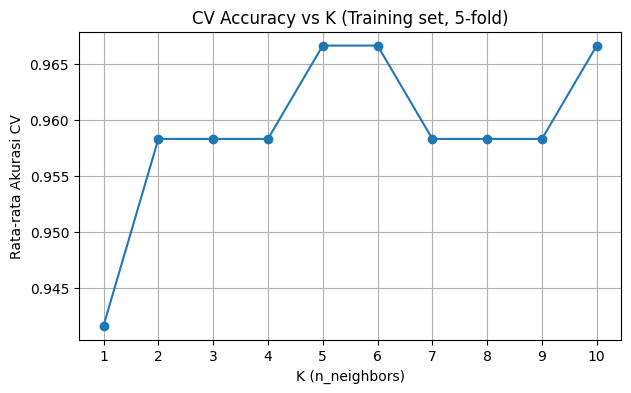

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

k_vals = range(1, 11)
scores_mean = []

for k in k_vals:
    model = KNeighborsClassifier(n_neighbors=k)
    # Pakai CV di training set (k-fold)
    cv_scores = cross_val_score(model, X_train_sc, y_train, cv=5)
    scores_mean.append(cv_scores.mean())

best_k = k_vals[int(np.argmax(scores_mean))]
best_acc = max(scores_mean)
print(f"K terbaik di CV: {best_k} (akurasi rata2: {best_acc:.3f})")

# Visualisasi k vs akurasi
plt.figure(figsize=(7,4))
plt.plot(list(k_vals), scores_mean, marker='o')
plt.title("CV Accuracy vs K (Training set, 5-fold)")
plt.xlabel("K (n_neighbors)")
plt.ylabel("Rata-rata Akurasi CV")
plt.xticks(list(k_vals))
plt.grid(True)
plt.show()

### Soal 5 – Visualisasi

1. Buat plot scatter (2D) menggunakan dua fitur:

- Petal Length

- Petal Width

2. Warnai titik berdasarkan label asli untuk melihat distribusi data.

3. Bandingkan hasilnya dengan prediksi model KNN.

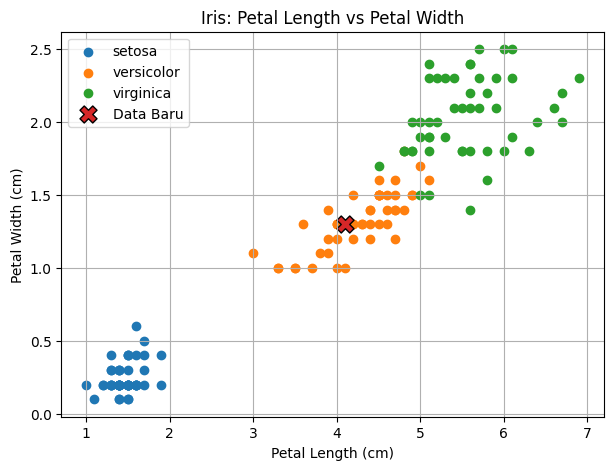

In [ ]:
# Siapkan DataFrame untuk memudahkan plotting
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

plt.figure(figsize=(7,5))
for name in iris.target_names:
    subset = df[df['species'] == name]
    plt.scatter(subset['petal length (cm)'], subset['petal width (cm)'], label=name)

# Titik data baru (gunakan 2 fitur yg sama)
plt.scatter([new_point[0,2]], [new_point[0,3]], marker='X', s=150, label='Data Baru', edgecolors='k')

plt.title("Iris: Petal Length vs Petal Width")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend
plt.grid(True)
plt.show()


### Full

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Soal 1 ---
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
print("Top 10 data:\n", df.head(10))
print("\nJumlah per kelas:\n", df['species'].value_counts())

# --- Soal 2 ---
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc  = scaler.transform(X_test)

knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train_sc, y_train)
y_pred = knn3.predict(X_test_sc)
print("\n[Soal 2] Akurasi k=3:", accuracy_score(y_test, y_pred))
print("[Soal 2] Laporan klasifikasi:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# --- Soal 3 ---
new_point = np.array([[5.8, 3.0, 4.1, 1.3]])
new_point_sc = scaler.transform(new_point)
pred = knn3.predict(new_point_sc)[0]
print("\n[Soal 3] Prediksi data baru:", iris.target_names[pred])

# --- Soal 4 ---
k_vals = range(1, 11)
scores_mean = []
for k in k_vals:
    model = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(model, X_train_sc, y_train, cv=5)
    scores_mean.append(cv_scores.mean())
best_k = k_vals[int(np.argmax(scores_mean))]
best_acc = max(scores_mean)
print(f"\n[Soal 4] K terbaik (CV 5-fold): {best_k}, akurasi rata2: {best_acc:.3f}")

plt.figure(figsize=(7,4))
plt.plot(list(k_vals), scores_mean, marker='o')
plt.title("CV Accuracy vs K (Training set)")
plt.xlabel("K (n_neighbors)")
plt.ylabel("Rata-rata Akurasi CV")
plt.xticks(list(k_vals))
plt.grid(True)
plt.show()

# --- Soal 5 ---
plt.figure(figsize=(7,5))
for name in iris.target_names:
    subset = df[df['species'] == name]
    plt.scatter(subset['petal length (cm)'], subset['petal width (cm)'], label=name)
plt.scatter([new_point[0,2]], [new_point[0,3]], marker='X', s=150, label='Data Baru', edgecolors='k')
plt.title("Iris: Petal Length vs Petal Width")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend()
plt.grid(True)
plt.show()
